<a href="https://colab.research.google.com/github/jidemaestri/Machine-Learning/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv
# Exercise extracted from: https://docs.microsoft.com/en-us/learn/modules/understand-regression-machine-learning/3-exercise-train-linear-regression


--2021-11-26 12:32:49--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py’

graphing.py         100%[===================>]  21.01K  --.-KB/s    in 0.001s  

2021-11-26 12:32:49 (22.7 MB/s) - ‘graphing.py’ saved [21511/21511]

--2021-11-26 12:32:49--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, aw

In [22]:

dataset = pandas.read_csv("doggy-illness.csv", delimiter="\t")
dataset.reset_index()
dataset.head()


,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53


In [21]:
dataset.index

RangeIndex(start=0, stop=98, step=1)

Relación entre Features 

In [7]:
import graphing

graphing.histogram(dataset, label_x='age', nbins=10, title="Feature", show=True)
graphing.histogram(dataset, label_x='core_temperature', nbins=10, title="Label")

#graphing.scatter_2D(dataset, label_x="age", label_y="core_temperature", title='core temperature as a function of age')


Regression Model

In [9]:

import statsmodels.formula.api as smf
import graphing # custom graphing code. See our GitHub repo for details

# First, we define our formula using a special syntax
# This says that core temperature is explained by age
formula = "core_temperature ~ age"

# Perform linear regression. This method takes care of
# the entire fitting procedure for us.
model = smf.ols(formula = formula, data = dataset).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [34]:
# Show a graph of the result
#graphing.scatter_2D(dataset,label_x='age',label_y='core_temperature',trendline=lambda x: model.params[1] * x + model.params[0])

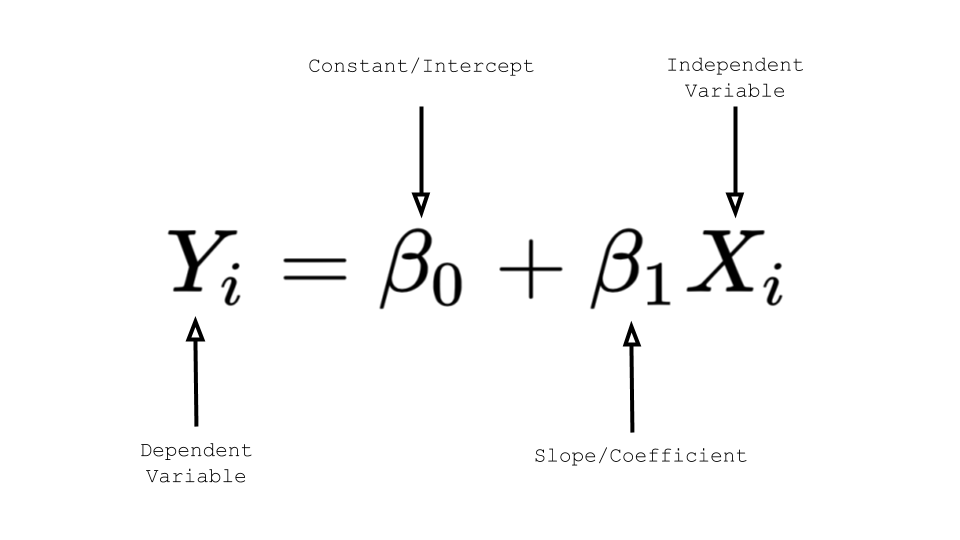

In [36]:
print("Ordenada / 'Constant' :", model.params[0], "  --  Pendiente / 'Slope' :", model.params[1])


Ordenada / 'Constant' : 38.087867548892085   --  Pendiente / 'Slope' : 0.15333957754731858


In [13]:

def estimate_temperature(age):
    # Model param[0] is the intercepts and param[1] is the slope
    return age * model.params[1] + model.params[0]

print("Estimate temperature from age")
print(estimate_temperature(age=0))



Estimate temperature from age
38.087867548892085


In [15]:

estimate_temperature(40)


44.22145065078483